# Predictive analysis of stroke risk factors and contributors

---



## Reading the CSV file 

In [1]:
# Import dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#reading the csv file 

data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Cleaning Data 

In [3]:
#data´s info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.shape

(5110, 12)

The data frame has 5,110 rows and 12 columns

In [5]:
#possible duplicates
data.duplicated().value_counts()

False    5110
dtype: int64

According to the operation above, we found that there are not duplicated values 

In [6]:
#
data['gender'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

Female    58.59%
Male      41.39%
Other      0.02%
Name: gender, dtype: object

<Axes: xlabel='gender'>

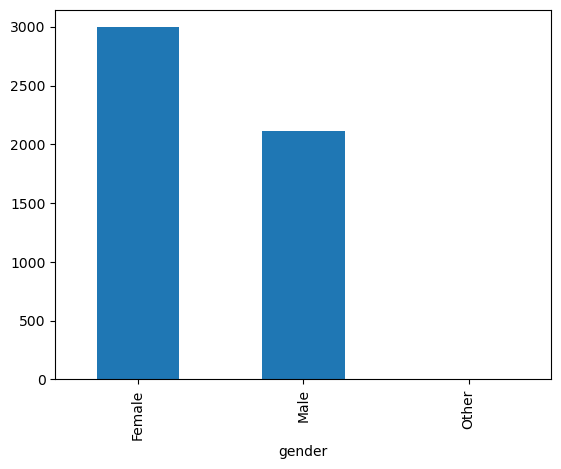

In [7]:
#plot by gender
data.groupby('gender')['gender'].count().plot(kind='bar')

Because we only have one record of "other", we are not able to do a complete general analysis based on one sample.

In [8]:
#for cleaning, we are going to drop the "other" value
data = data[data['gender']!='Other']
data.shape

(5109, 12)

In [9]:
#Checking for NA values

data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We decided to drop the missing values to ensure our data is uniform, due to the minimum impact (0.4%) on patient records. 

In [10]:
#With the "isnull" we can see if there are any NA values in the data frame, in this case the column bmi has 201 NA values
#drop NA
data = data.dropna()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
#make the id column the index
data = data.set_index('id').sort_values('id', ascending=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0


In [12]:
#Statistics summary of avg glucose level and bmi(Body Mass Index)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Creating a new csv file with the cleaned data 

In [13]:
data.to_csv('./data/dataset_stroke.csv')

In [2]:
# dependencies

import pandas as pd
import matplotlib.pyplot as plt

# What percentage of the patients in the sample have suffered a stroke?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

stroke_df = pd.read_csv('./data/dataset_stroke.csv')
percentage = 100*len(stroke_df[stroke_df['stroke']=="Yes"])/len(stroke_df)
print(f'percentage of people to suffer a stroke: {percentage:.2f}%')

percentage of people to suffer a stroke: 4.26%


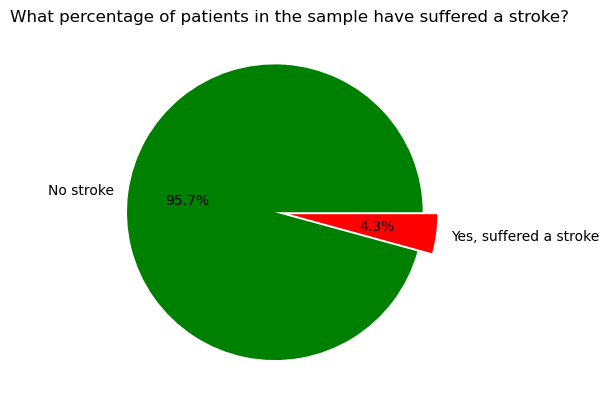

In [55]:
import matplotlib.pyplot as plt

x_value = ['No stroke','Yes, suffered a stroke']
y_value = [100-percentage,percentage]
plt.pie(y_value, labels=x_value,autopct='%1.1f%%',colors=['green','red'], explode=[0.1,0])
plt.title('What percentage of patients in the sample have suffered a stroke?')
plt.show()


# Which gender is more likely to have a stroke?

In [59]:
import pandas as pd

gender_df = pd.read_csv('./data/dataset_stroke.csv')

gender_df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [60]:
gender_df[stroke_df['stroke']=="Yes"]['gender'].value_counts()

Female    120
Male       89
Name: gender, dtype: int64

In [72]:
gender_df = gender_df[['gender','stroke']]
gender_counts = gender_df.groupby('gender')['stroke'].value_counts()
gender_percentages = gender_counts.groupby(level=0, group_keys=True).apply(lambda x: 100 * x / float(x.sum()))
gender_percentages

gender  gender  stroke
Female  Female  No        95.857784
                Yes        4.142216
Male    Male    No        95.574341
                Yes        4.425659
Name: stroke, dtype: float64

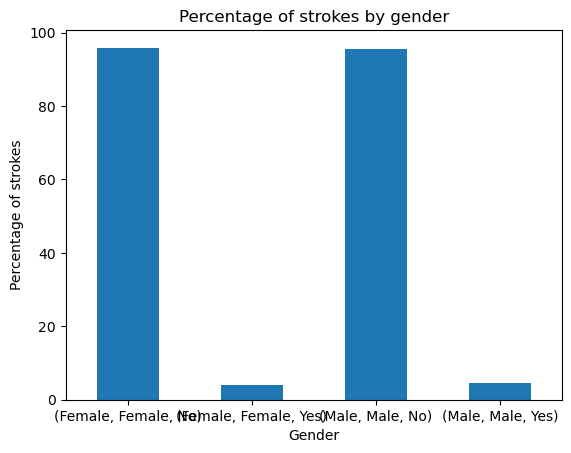

In [74]:


gender_percentages.plot.bar(rot=0, xlabel='Gender', ylabel='Percentage of strokes', title='Percentage of strokes by gender')
plt.show()